<a href="https://colab.research.google.com/github/YoshifumiMiyagi/MP_IP/blob/main/MP_0528.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
SEED = 42

import numpy as np
import pandas as pd
import codecs

from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [49]:
with codecs.open("/content/drive/MyDrive/MP_IP_0528.csv", "r", "Shift-JIS", "ignore") as file:
    raw = pd.read_table(file, delimiter=",")
raw.head()

,Age,Sex,PA,Results_1,Results_2,Fever,Fever duration,alleviation of fever,Examin Day,P day,...,Neu,Eosino,Baso,Lym,Mono,PCT,PA,Ur_β2-MG,Ur_NAG,Unnamed: 56
0,1.83,M,320,-,0.0,NaN,8.0,8.0,6.0,NaN,...,56.0,1,NaN,31.0,10.0,0.694,320,NaN,NaN,NaN
1,8.33,F,20480,-,0.0,1,9.0,1.0,9.0,9.0,...,55.0,6,1,33.0,5.0,NaN,NaN,NaN,NaN,NaN
2,8.08,F,20480,-,0.0,2,9.0,1.0,8.0,8.0,...,67.0,1,1,21.0,7.0,0.137,NaN,NaN,NaN,NaN
3,7.75,F,320→5120,-,0.0,1,10.0,0.0,8.0,8.0,...,66.0,2,1,20.0,10.0,0.213,NaN,NaN,NaN,NaN
4,2.25,F,40未満→160,-,0.0,NaN,11.0,11.0,10.0,NaN,...,51.0,NaN,NaN,37.0,8.0,0.445,160,NaN,NaN,NaN


In [50]:
MP = raw[((raw['1st_med_response'] ==1)|(raw['2nd_med_response'] ==1))&(raw['Steroid']!=1)]
MP.head()

,Age,Sex,PA,Results_1,Results_2,Fever,Fever duration,alleviation of fever,Examin Day,P day,...,Neu,Eosino,Baso,Lym,Mono,PCT,PA,Ur_β2-MG,Ur_NAG,Unnamed: 56
1,8.33,F,20480,-,0.0,1,9.0,1.0,9.0,9.0,...,55.0,6,1,33.0,5.0,NaN,NaN,NaN,NaN,NaN
2,8.08,F,20480,-,0.0,2,9.0,1.0,8.0,8.0,...,67.0,1,1,21.0,7.0,0.137,NaN,NaN,NaN,NaN
5,8.16,F,320,-,0.0,1,12.0,1.0,6.0,6.0,...,61.1,0.2,0.2,32.3,6.2,NaN,320,NaN,NaN,NaN
6,13.92,M,2560,-,0.0,7,4.0,1.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.16,M,40→5120,-,0.0,1,10.0,1.0,5.0,5.0,...,67.6,0.5,0.1,27.3,4.5,NaN,40→5120,NaN,NaN,NaN


In [51]:
RMPP = raw[(raw['1st_med_response'] ==0)&(raw['2nd_med_response'] ==0)&(raw['Examin Day']>=7)]
RMPP.head()

,Age,Sex,PA,Results_1,Results_2,Fever,Fever duration,alleviation of fever,Examin Day,P day,...,Neu,Eosino,Baso,Lym,Mono,PCT,PA,Ur_β2-MG,Ur_NAG,Unnamed: 56
7,8.42,M,5120,-,0.0,1,12.0,1.0,10.0,10.0,...,67.0,7,NaN,18.0,5.0,0.185,5120,NaN,NaN,NaN
8,6.50,M,2560,-,0.0,1,12.0,1.0,8.0,8.0,...,62.0,4,1,27.0,5.0,NaN,NaN,NaN,NaN,NaN
29,4.83,M,未検,ﾏｸﾛﾗｲﾄﾞ感性,1.0,1,NaN,0.0,9.0,9.0,...,70.8,3.1,0.4,21.1,4.6,0.142,未検,NaN,NaN,NaN
32,12.42,F,未検,ﾏｸﾛﾗｲﾄﾞ感性,1.0,1,9.0,1.0,7.0,7.0,...,64.0,3,NaN,26.0,5.0,NaN,未検,NaN,NaN,NaN
75,5.92,M,未検,ﾏｸﾛﾗｲﾄﾞ感性,1.0,1,9.0,1.0,8.0,8.0,...,50.5,10.1,50.5,32.5,0.3,NaN,未検,NaN,NaN,NaN


# LDH (RMPP_Steroid vs RMPP_non_Steroid)

In [53]:
stats.shapiro(raw["LDH"].replace(' ',np.nan).dropna().astype(float)) # non_normal_distribution

ShapiroResult(statistic=0.8440157175064087, pvalue=2.0322056537569466e-11)

In [54]:
MP['LDH'].median(), RMPP['LDH'].median()

(275.0, 337.5)

In [55]:
 stats.mannwhitneyu(MP['LDH'].dropna(), RMPP['LDH'].dropna())

MannwhitneyuResult(statistic=401.0, pvalue=0.004339374016926793)

In [56]:
roc1 = MP['LDH'].dropna()
roc2 = RMPP['LDH'].dropna()

len(roc1),len(roc2)

(91, 16)

In [57]:
ROC = pd.concat([roc1,roc2]).values
label = np.ones(len(ROC))
label[:len(roc1)] = 0
label.shape

(107,)

In [60]:
fpr, tpr, thresholds = roc_curve(label,ROC)
fpr, tpr, thresholds
roc_auc = auc(fpr, tpr)
roc_auc

0.7245879120879122

In [62]:
fpr, tpr, thresholds = roc_curve(label,ROC)
roc_auc = auc(fpr, tpr)
J = tpr - fpr
index = np.argmax(J)
best_threshold = thresholds[index]
print(best_threshold)

sensitivity = tpr[index]
specificity = 1 - fpr[index]
print("sensitivity:", sensitivity)
print("specificity:", specificity)

277.0
sensitivity: 0.9375
specificity: 0.5164835164835164


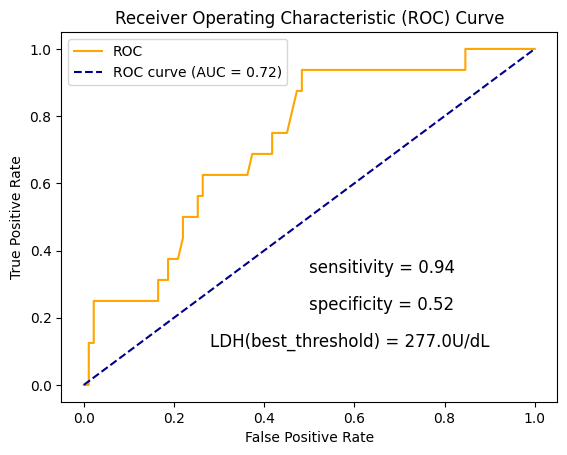

AUC: 0.7245879120879122


In [72]:
# Calculate AUC
auc = roc_auc_score(label,ROC)
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(label,ROC)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.text(0.5, 0.35, 'sensitivity = {}'.format(str(round(sensitivity, 2))), transform=plt.gca().transAxes, fontsize=12)
plt.text(0.5, 0.25, 'specificity = {}'.format(str(round(specificity, 2))), transform=plt.gca().transAxes, fontsize=12)
plt.text(0.3, 0.15, 'LDH(best_threshold) = {}U/dL'.format(str(round(best_threshold, 5))), transform=plt.gca().transAxes, fontsize=12)

plt.show()

# Print AUC
print("AUC:", auc)

# Fever duration (RMPP_Steroid vs RMPP_non_Steroid)

In [33]:
RMPP.Steroid.value_counts()

Steroid
0.0    10
1.0     5
Name: count, dtype: int64

In [42]:
RMPP_Steroid = RMPP[RMPP['Steroid'] == 1]
RMPP_non_Steroid = RMPP[RMPP['Steroid'] == 0]
RMPP_Steroid

,Age,Sex,PA,Results_1,Results_2,Fever,Fever duration,alleviation of fever,Examin Day,P day,...,Neu,Eosino,Baso,Lym,Mono,PCT,PA,Ur_β2-MG,Ur_NAG,Unnamed: 56
7,8.42,M,5120,-,0.0,1,12.0,1.0,10.0,10.0,...,67.0,7,NaN,18.0,5.0,0.185,5120,NaN,NaN,NaN
75,5.92,M,未検,ﾏｸﾛﾗｲﾄﾞ感性,1.0,1,9.0,1.0,8.0,8.0,...,50.5,10.1,50.5,32.5,0.3,NaN,未検,NaN,NaN,NaN
120,12.67,F,未検,ﾏｸﾛﾗｲﾄﾞ耐性,2.0,1,10.0,1.0,14.0,9.0,...,76.0,4,NaN,17.0,3.0,NaN,未検,NaN,NaN,NaN
159,6.42,F,40,ﾏｸﾛﾗｲﾄﾞ耐性,2.0,1,7.0,1.0,8.0,8.0,...,70.0,NaN,NaN,26.0,4.0,0.128,40,NaN,NaN,NaN
162,5.33,M,未検,ﾏｸﾛﾗｲﾄﾞ耐性,2.0,2,10.0,1.0,7.0,7.0,...,50.7,0,0.3,45.9,3.1,2.730,未検,NaN,NaN,NaN


In [43]:
RMPP_Steroid['Fever duration']

7      12.0
75      9.0
120    10.0
159     7.0
162    10.0
Name: Fever duration, dtype: float64

In [44]:
RMPP_non_Steroid['Fever duration']

29      NaN
32      9.0
110     NaN
117    11.0
118     NaN
126     7.0
128     NaN
142     7.0
158    10.0
165     NaN
Name: Fever duration, dtype: float64

In [48]:
stats.ttest_ind(RMPP_Steroid['Fever duration'].dropna(),RMPP_non_Steroid['Fever duration'].dropna(),equal_var=False)

TtestResult(statistic=0.7016464154456226, pvalue=0.5028017717513693, df=7.99810695693327)